In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns

### load datasets

In [2]:
import pandas as pd

In [3]:
df_TOCC = pd.read_csv('../../datasets/TypeOfContractChannel.csv')
df_TOCC[:2]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


In [6]:
df_TOCC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

### 단일 변수

In [7]:
df_TOCC.describe(include=object)

,type_of_contract,type_of_contract2,channel,datetime,payment_type,product,state,overdue,bank,cancellation
count,51300,51303,51304,51304,51304,51303,51304,51302,48544,51279
unique,2,9,20,101,5,6,4,2,46,2
top,렌탈,Promotion,서비스 방문,2019-10-29,CMS,K1,계약확정,없음,국민은행,정상
freq,46481,15811,15186,817,32825,39134,50350,49112,9901,50372


In [8]:
df_TOCC.describe(include=object).columns

Index(['type_of_contract', 'type_of_contract2', 'channel', 'datetime',
       'payment_type', 'product', 'state', 'overdue', 'bank', 'cancellation'],
      dtype='object')

#### 범주형 : 주로 문자, 항목으로 구성

In [9]:
df_TOCC['type_of_contract'].value_counts()

렌탈     46481
멤버십     4819
Name: type_of_contract, dtype: int64

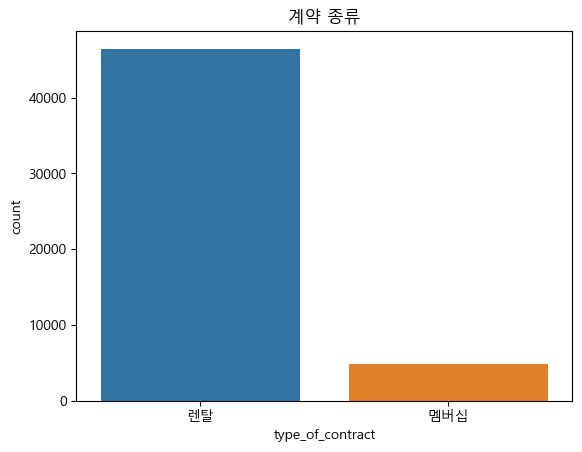

In [12]:
sns.countplot(data=df_TOCC, x='type_of_contract')
plt.title("계약 종류")
plt.show()

In [26]:
# 거래 은행 중 상위 7개 확인 (bacnk column -> 항목 serise -> index 축출 -> list 변환 -> slicing 7
order_list = df_TOCC['bank'].value_counts().index.to_list()[:7]
order_list

['국민은행', '롯데카드', '농협은행', '신한은행', '우리은행', '기업은행', '신한카드']

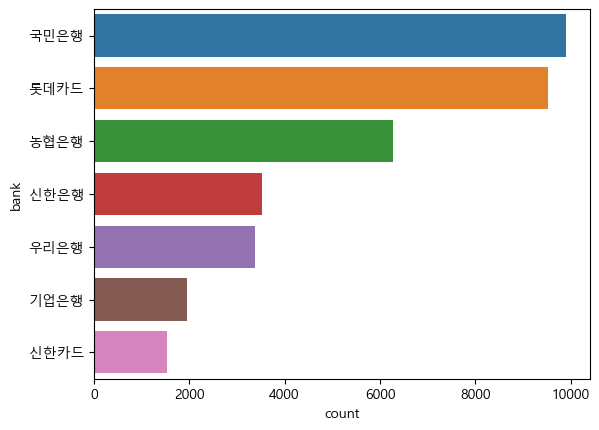

In [27]:
# sns.countplot(data=df_TOCC, y='bank', order=['국민은행', '롯데카드', 'BC카드'])
sns.countplot(data=df_TOCC, y='bank', order=order_list)
plt.show()

#### 연속형 : 범주형 아닌 것

In [28]:
df_TOCC.describe()

,id,Term,amount,overdue_count,credit rating,age,Mileage
count,5.130400e+04,51304.000000,51304.000000,51304.000000,42521.000000,40509.000000,40509.000000
mean,6.266457e+07,55.638527,93994.980021,0.161040,3.428894,46.608285,1967.922412
std,1.216115e+07,12.010117,15305.147334,1.122356,2.213590,13.465977,436.707329
min,2.568798e+07,12.000000,54603.000000,-1.000000,0.000000,20.000000,872.000000
25%,6.643149e+07,60.000000,81900.000000,0.000000,1.000000,37.000000,1646.000000
50%,6.676578e+07,60.000000,96900.000000,0.000000,3.000000,46.000000,1946.000000
75%,6.678161e+07,60.000000,98400.000000,0.000000,5.000000,56.000000,2263.000000
max,6.696986e+07,60.000000,215700.000000,15.000000,10.000000,107.000000,3803.000000


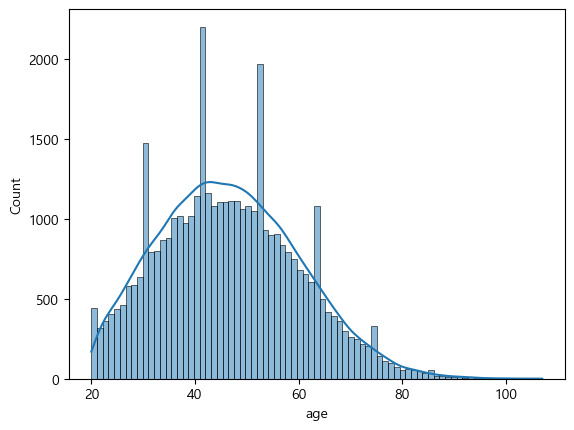

In [36]:
sns.histplot(data=df_TOCC, x='age', kde=True) 
plt.show()

<AxesSubplot:xlabel='age'>

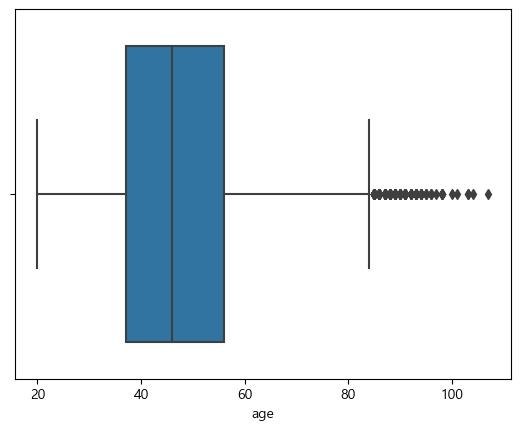

In [40]:
sns.boxplot(data=df_TOCC, x='age')

#### IQR

In [41]:
df_TOCC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

### 다변수

#### X(설명변수) / Y(목표변수) : 범주형 / 연속형

In [5]:
df_TOCC.columns

Index(['id', 'type_of_contract', 'type_of_contract2', 'channel', 'datetime',
       'Term', 'payment_type', 'product', 'amount', 'state', 'overdue_count',
       'overdue', 'credit rating', 'bank', 'cancellation', 'age', 'Mileage'],
      dtype='object')

In [9]:
df_TOCC['amount'].describe()

count     51304.000000
mean      93994.980021
std       15305.147334
min       54603.000000
25%       81900.000000
50%       96900.000000
75%       98400.000000
max      215700.000000
Name: amount, dtype: float64

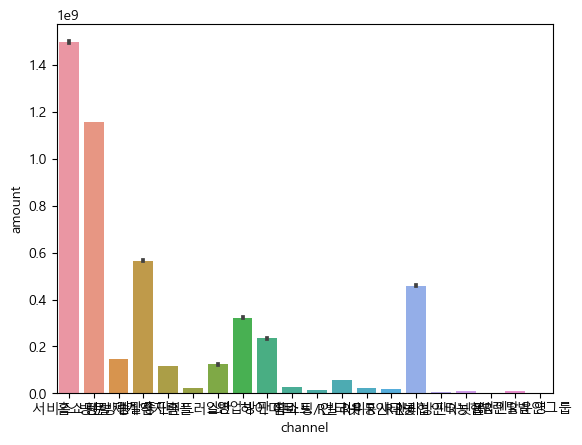

In [10]:
# sns.barplot(data=df_TOCC, x='channel', y='amount') # 기본 평균
sns.barplot(data=df_TOCC, x='channel', y='amount', estimator=sum) # 기본 총합
plt.show()

In [18]:
df_TOCC_sum = pd.pivot_table(data=df_TOCC, index='channel', values='amount', aggfunc=sum)
df_TOCC_bottom_list = df_TOCC_sum.sort_values(by='amount', ascending=False).iloc[-7:].index.to_list()

In [22]:
df_TOCC_sum[:2]

,amount
channel,
R관리방판,458556039
R농협,11337960


<AxesSubplot:xlabel='channel', ylabel='amount'>

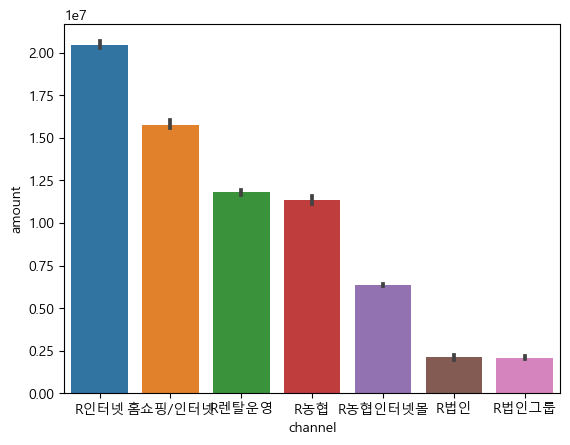

In [19]:
sns.barplot(data=df_TOCC_sum, x='channel', y='amount', estimator=sum, order=df_TOCC_bottom_list) # 하위 7개 순위 표현

<AxesSubplot:xlabel='channel', ylabel='amount'>

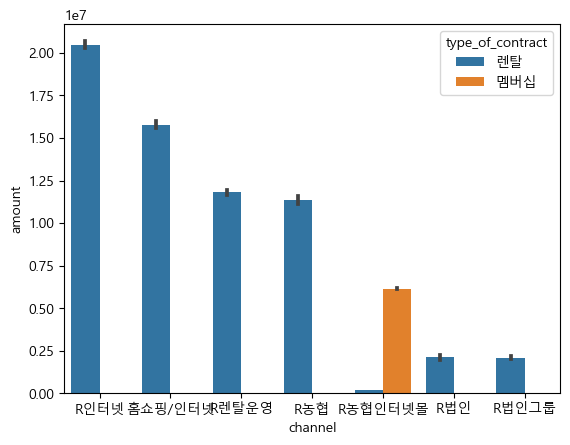

In [20]:
sns.barplot(data=df_TOCC, x='channel', y='amount', estimator=sum, order=df_TOCC_bottom_list, hue='type_of_contract') # 하위 7개 순위 표현

##### boxplot

In [23]:
df_TOCC_top_list = df_TOCC_sum.sort_values(by='amount', ascending=False).iloc[:3].index.to_list()
df_TOCC_top_list

['서비스 방문', '홈쇼핑/방송', '렌탈총판']

<AxesSubplot:xlabel='channel', ylabel='amount'>

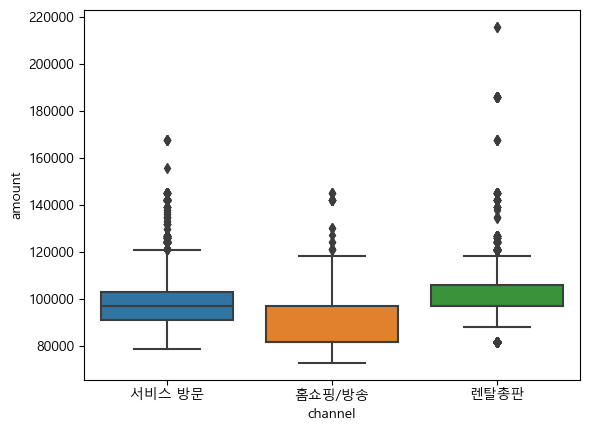

In [25]:
sns.boxplot(data=df_TOCC, x='channel', y='amount', order=df_TOCC_top_list)

#### X(설명변수) / Y(목표변수) : 연속형 / 연속형
- 상관성 : 사회과학/마케팅(인간 개입됨) 높지 않음. 제조공정/실험실/자연과학 높음.

In [27]:
df_TOCC.describe()[:2]

,id,Term,amount,overdue_count,credit rating,age,Mileage
count,5.130400e+04,51304.000000,51304.000000,51304.00000,42521.000000,40509.000000,40509.000000
mean,6.266457e+07,55.638527,93994.980021,0.16104,3.428894,46.608285,1967.922412


<AxesSubplot:xlabel='Mileage', ylabel='age'>

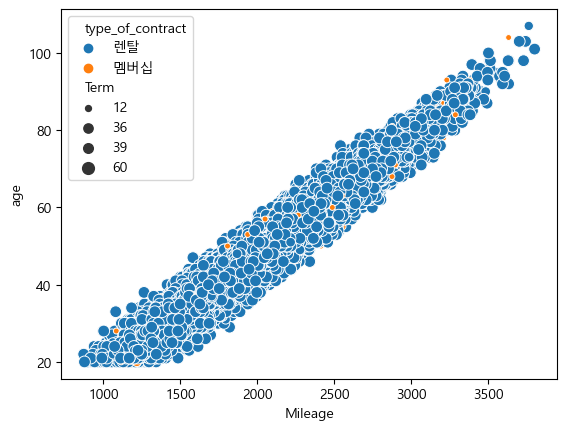

In [47]:
sns.scatterplot(data=df_TOCC, x='Mileage', y='age', hue='type_of_contract', size='Term')
# 분석 : Mileage가 많을 수록 age 많다., 25~35세 사이 고객 타겟팅

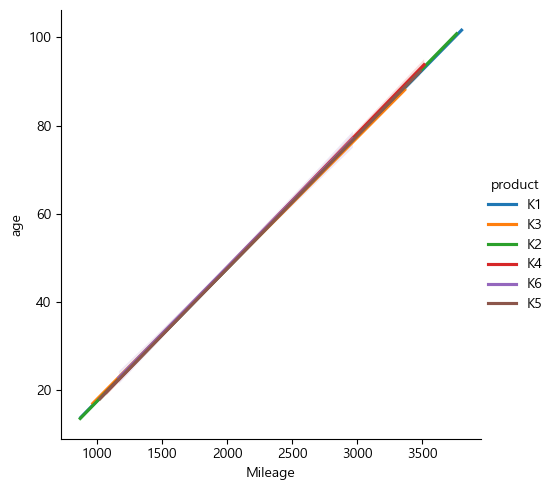

In [38]:
sns.lmplot(data=df_TOCC, x='Mileage', y='age', hue='product', scatter=False)

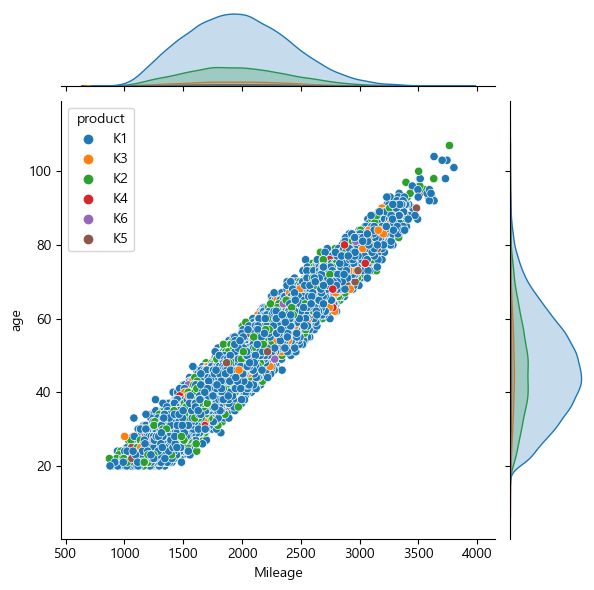

In [40]:
sns.jointplot(data=df_TOCC, x='Mileage', y='age', hue='product')

In [41]:
df_TOCC.corr() # 연속형 변수만 적용

,id,Term,amount,overdue_count,credit rating,age,Mileage
id,1.000000,0.018640,-0.162013,-0.011126,0.010875,0.000030,-0.000965
Term,0.018640,1.000000,0.465662,-0.013498,-0.042443,-0.008474,-0.007871
amount,-0.162013,0.465662,1.000000,0.075492,-0.017583,-0.003537,-0.004146
overdue_count,-0.011126,-0.013498,0.075492,1.000000,0.202012,-0.001720,-0.002637
credit rating,0.010875,-0.042443,-0.017583,0.202012,1.000000,0.004609,0.002921
age,0.000030,-0.008474,-0.003537,-0.001720,0.004609,1.000000,0.973281
Mileage,-0.000965,-0.007871,-0.004146,-0.002637,0.002921,0.973281,1.000000


In [43]:
df_TOCC.describe().columns

Index(['id', 'Term', 'amount', 'overdue_count', 'credit rating', 'age',
       'Mileage'],
      dtype='object')

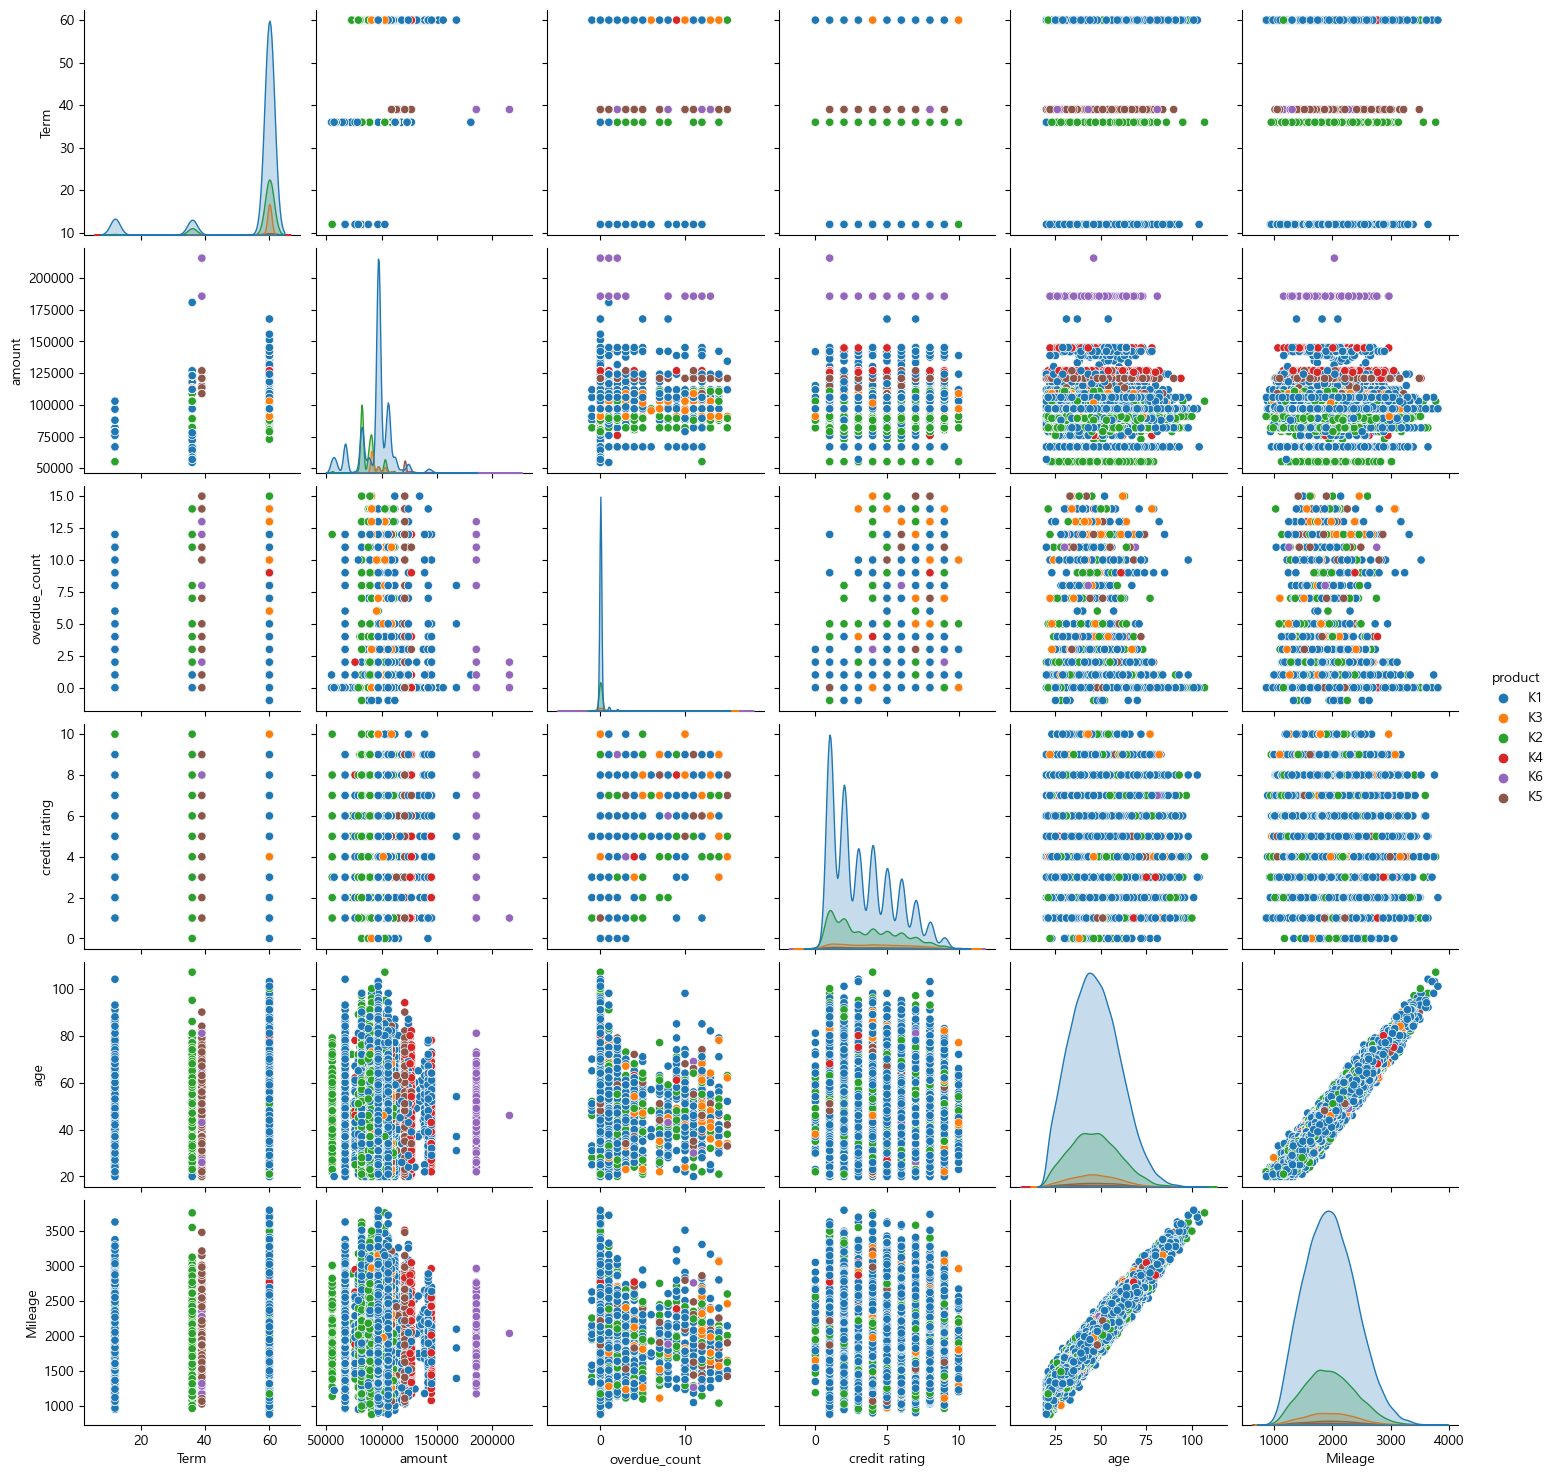

In [46]:
# sns.pairplot(data=df_TOCC[['Term', 'amount', 'overdue_count', 'credit rating', 'age','Mileage']])
sns.pairplot(data=df_TOCC[['Term', 'amount', 'overdue_count', 'credit rating', 'age','Mileage', 'product']], hue='product')

### X(설명변수) / Y(목표변수) : 연속(순서)형 / 연속형

In [48]:
df_TOCC.describe(include=object)

,type_of_contract,type_of_contract2,channel,datetime,payment_type,product,state,overdue,bank,cancellation
count,51300,51303,51304,51304,51304,51303,51304,51302,48544,51279
unique,2,9,20,101,5,6,4,2,46,2
top,렌탈,Promotion,서비스 방문,2019-10-29,CMS,K1,계약확정,없음,국민은행,정상
freq,46481,15811,15186,817,32825,39134,50350,49112,9901,50372


In [51]:
df_TOCC['datetime(timestemp)'] = pd.to_datetime(df_TOCC['datetime'])
df_TOCC['datetime(timestemp)']

0       2019-10-20
1       2019-10-20
2       2019-10-20
3       2019-10-20
4       2019-10-20
           ...    
51299   2020-02-03
51300   2020-02-03
51301   2020-02-03
51302   2020-02-03
51303   2020-02-03
Name: datetime(timestemp), Length: 51304, dtype: datetime64[ns]

<AxesSubplot:xlabel='datetime(timestemp)', ylabel='amount'>

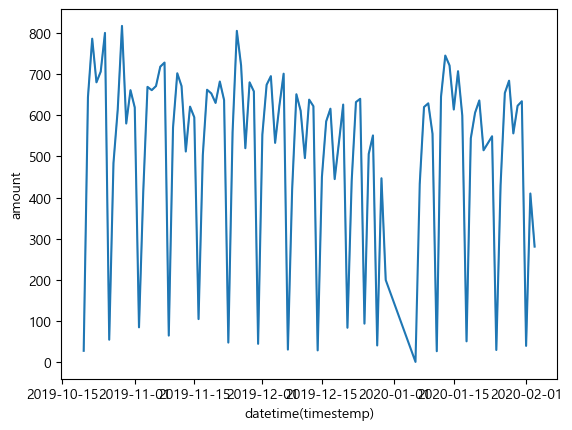

In [55]:
# sns.lineplot(data=df_TOCC, x='datetime(timestemp)', y='amount')
sns.lineplot(data=df_TOCC, x='datetime(timestemp)', y='amount', estimator=len)